# 시각화(EDA)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"C:\Users\leeyh\OneDrive\문서\기계학습및설계") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

In [2]:
# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

C:\Users\leeyh\AppData\Local\Temp\ipykernel_18124\1979260110.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/


In [7]:
#데이터 일부 확인
df=pd.read_csv("winequality-red.csv",encoding='euc-kr') 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
df.isnull().sum().to_frame('nan_count')

,nan_count
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [9]:
# 변수 타입 파악
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [13]:
#통계량 파악
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


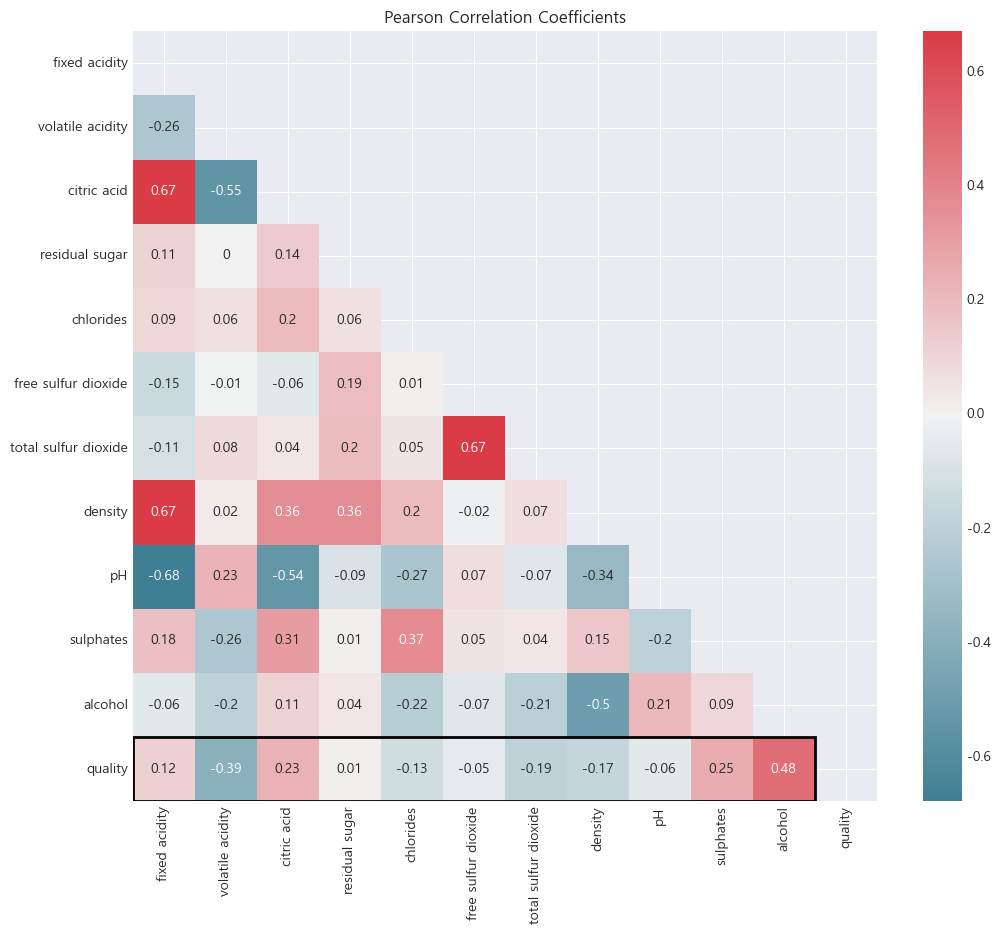

In [22]:
# 전체 데이터에 대한 상관관계 HeatMap 시각화
corr = round(df.corr(), 2)
plt.figure(figsize=(12,10))
plt.title("Pearson Correlation Coefficients")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(corr, cmap=cmap, annot=True, mask=mask)

rect_x = 0
rect_y = 11
rect_width = 11
rect_height = 1
rect = plt.Rectangle((rect_x, rect_y), rect_width, rect_height, linewidth=2, edgecolor='black', facecolor='none')
plt.gca().add_patch(rect)
plt.show()

#0.8 이상: 강한 상관관계, 0.4~0.8: 중간의 상관관계, 0.4 이하: 약한 상관관계
#결과적으로, (fixed acidity-citric acid: 0.67)/(fixed acidity-density: 0.67)/(free sulfur dioxide-total sulfur dioxide: 0.67)
#(quality-alcohol:0.48)/(pH-fixed cidity: -0.68)/(citric acid-volatile acidity :-0.55)-> 중간정도의 상관관계


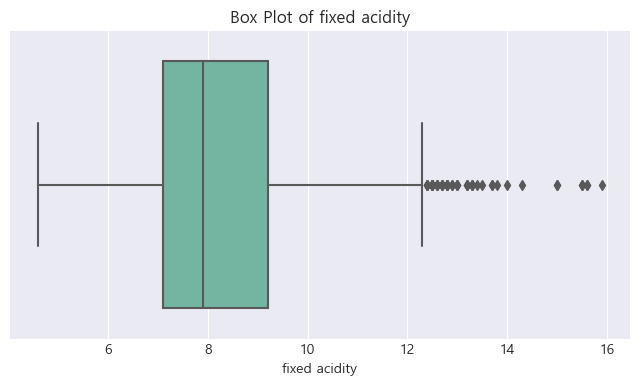

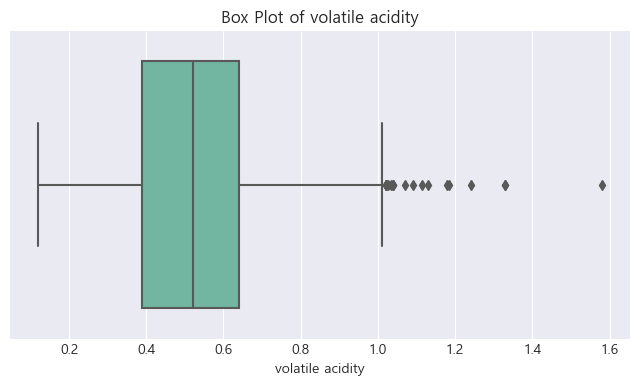

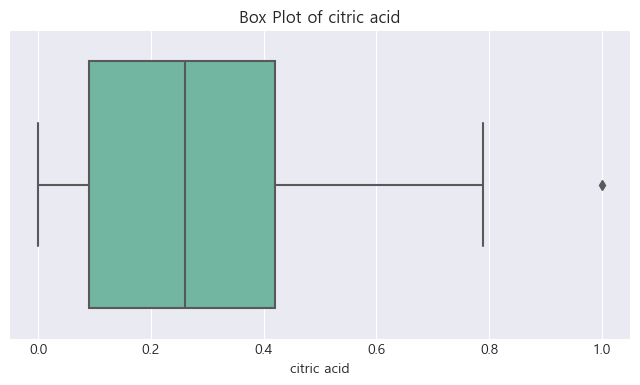

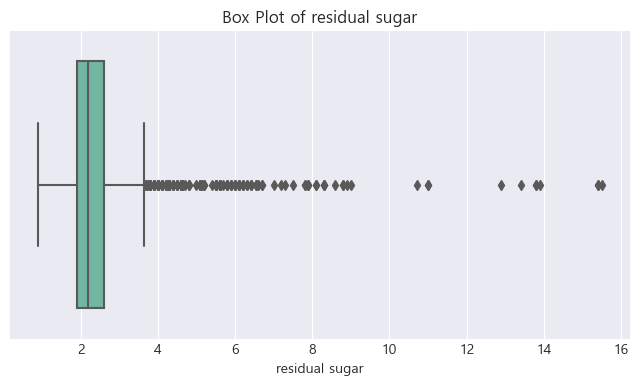

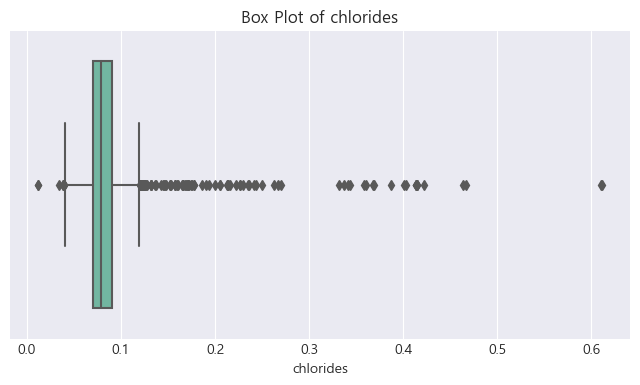

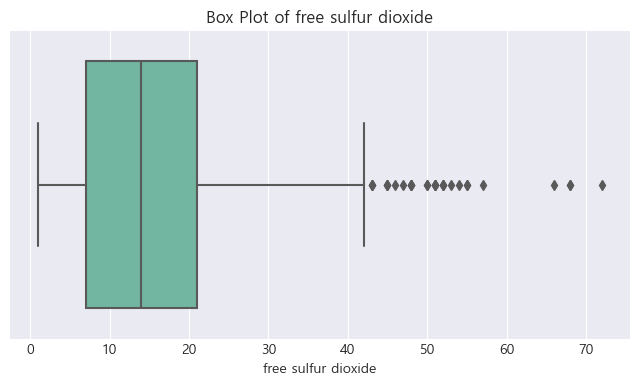

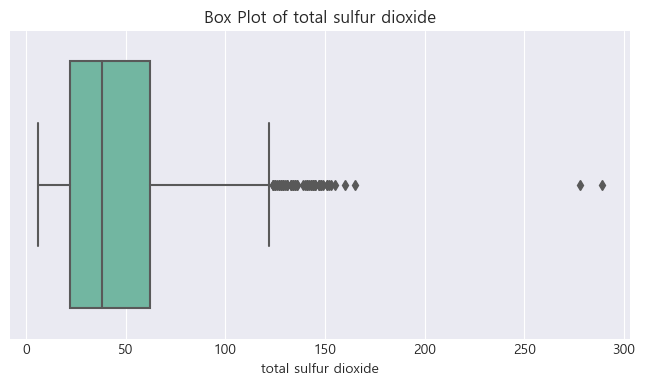

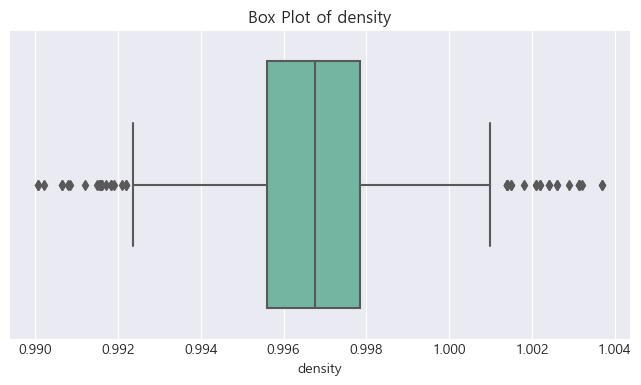

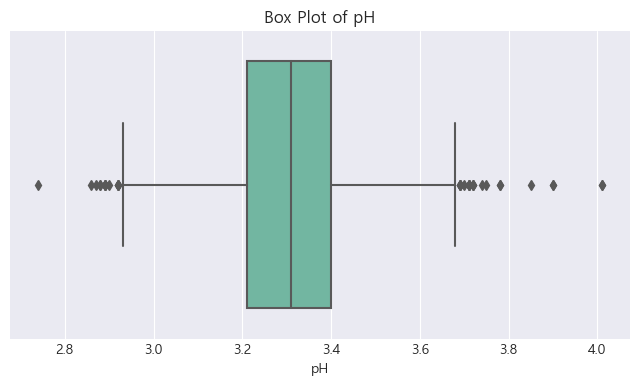

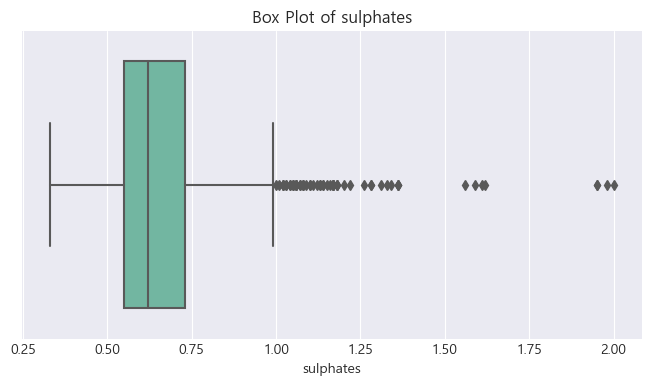

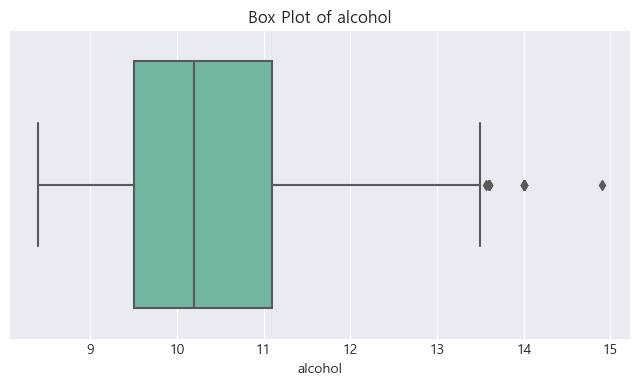

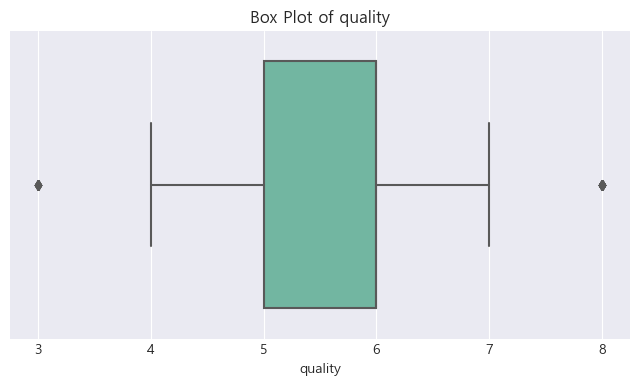

In [21]:
#Boxplot of all variables
columns_to_plot = df.columns
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    plt.title(f'Box Plot of {col}')
    sns.boxplot(data=df, x=col, palette="Set2")
    plt.show()

Text(0.5, 1.0, 'Count of Wine Quality')

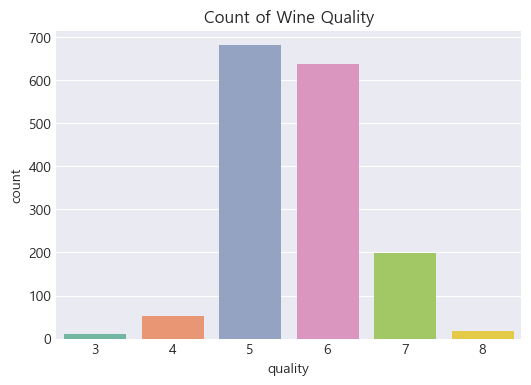

In [23]:
#Countplot of Quality Variable
plt.figure(figsize=(6, 4))
sns.countplot(x="quality", data=df, palette="Set2")
plt.title("Count of Wine Quality")

#결과적으로, quality 변수는 3-8까지만 존재함을 알 수 있다.

Text(0.5, 1.0, 'Violin Plot of Alcohol by Wine Quality')

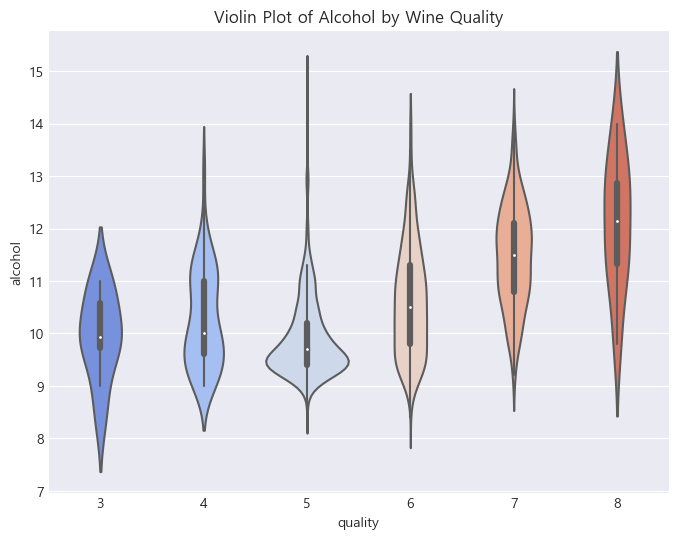

In [30]:
#바이올린 플롯(alcohol-quality), 품질과 상관계수가 가장 높은 alcohol 변수
plt.figure(figsize=(8, 6))
sns.violinplot(x="quality",y="alcohol", data=df, palette="coolwarm")
plt.title("Violin Plot of Alcohol by Wine Quality")

In [32]:
#Standardization 표준화..?
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df.iloc[:,:-1]=std.fit_transform(df.iloc[:,:-1]) #Standardize data set except dependent value(Quality feature)

# 테스트 데이터&트레인 데이터

In [36]:
from sklearn.model_selection import train_test_split
X = df[df.columns.difference(['quality'])]
y = df[['quality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df1.shape)

(1279, 11)
(320, 11)
(1279, 1)
(320, 1)


NameError: name 'df1' is not defined

# (1)SelectKBest 모듈 활용하여 변수 선택

In [37]:
# target(quality)와 가장 correlated 된 features 를 k개 고르기.
## f_regresison, SelectKBest 불러오기.
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=5)
## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)
## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

C:\Users\leeyh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((1279, 5), (320, 5))

In [40]:
all_names = X_train.columns
## selector.get_support()
selected_mask = selector.get_support()
## 선택된 특성(변수)들
selected_names = all_names[selected_mask]
## 선택되지 않은 특성(변수)들
unselected_names = all_names[~selected_mask]
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['alcohol', 'citric acid', 'sulphates', 'total sulfur dioxide',
       'volatile acidity'],
      dtype='object')
Unselected names:  Index(['chlorides', 'density', 'fixed acidity', 'free sulfur dioxide', 'pH',
       'residual sugar'],
      dtype='object')
